In [1]:
from data_parser import get_data
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from kernel_methods import KernelSVC
from kernels import DirectProductGraphKernel, DiracKernel, AllNodePairsKernel, AllEdgePairsKernel, WL_relabelling, WL_relabelling_with_edges
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from tqdm import tqdm
from kernels import WLKernel

training_data, training_labels, test_data = get_data()


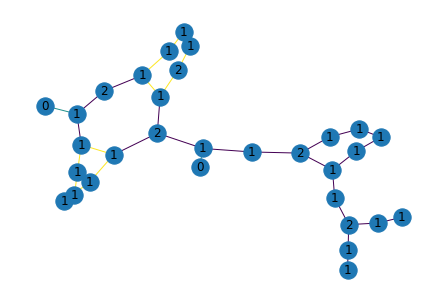

In [2]:
g = training_data[1098]

labels_edges = []
for k, v in nx.get_edge_attributes(g,'labels').items():
    labels_edges.append(v[0])

clean_labels_nodes = {}
labels_nodes = nx.get_node_attributes(g,"labels")
for k, v in labels_nodes.items():
    clean_labels_nodes[k] = v[0]

nx.draw(g, edge_color = labels_edges, labels = clean_labels_nodes, with_labels = True)


In [3]:
g

In [40]:
X_train, X_test, y_train, y_test = train_test_split(training_data, training_labels, test_size=0.01)
y_train = np.array(y_train)
y_train = (2*(y_train-.5))

y_test = np.array(y_test)
y_test = (2*(y_test-.5))

In [42]:
n = len(X_train)
kernel = WLKernel(h = 4, relabelling_method= WL_relabelling_with_edges, lmbda= 1.2).kernel
kernel_X = np.ones((n,n))
for i in tqdm(range(n)):
    for j in range(i+1,n):
        similarity = kernel(X_train[i],X_train[j])             
        kernel_X[i,j] = similarity
        kernel_X[j,i] = similarity

  6%|▌         | 365/5940 [1:12:15<18:23:43, 11.88s/it]


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\33785\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\33785\AppData\Local\Temp\ipykernel_10068\2508298299.py", line 6, in <cell line: 4>
    similarity = kernel(X_train[i],X_train[j])
  File "c:\Users\33785\Maths\MVA\Kernel methods\kaggle\kernels.py", line 191, in kernel
    m1, m2 = self.relabelling_method(G1, G2, self.h)
  File "c:\Users\33785\Maths\MVA\Kernel methods\kaggle\kernels.py", line -1, in WL_relabelling_with_edges
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\33785\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 1993, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "c:\Users\33785\AppData\Local\Programs\Python\Python3

In [ ]:
clf = SVC(C = 1, kernel = "precomputed", probability=True, class_weight="balanced")

clf.fit(kernel_X, np.array(y_train[:n]))

SVC(C=1, class_weight='balanced', kernel='precomputed', probability=True)

In [29]:
n_test = 50
kernel = WLKernel(h = 4, relabelling_method= WL_relabelling_with_edges, lmbda = 1.1).kernel
kernel_X_test = np.ones((n_test,n))
for i in tqdm(range(n_test)):
    for j in range(n):
        similarity = kernel(X_test[i],X_train[j])             
        kernel_X_test[i,j] = similarity

100%|██████████| 50/50 [05:29<00:00,  6.59s/it]


In [36]:
preds = clf.predict_log_proba(kernel_X_test[:n_test])

In [37]:
roc_auc_score(y_test[:n_test],preds[:,1])

0.8695652173913043

### Test

In [ ]:
n_test = len(test_data)
kernel = WLKernel(h = 4, relabelling_method= WL_relabelling_with_edges, lmbda = 1.2).kernel
kernel_X_test = np.ones((n_test,n))
for i in tqdm(range(n_test)):
    for j in range(n):
        similarity = kernel(test_data[i],X_train[j])             
        kernel_X_test[i,j] = similarity

100%|██████████| 2000/2000 [5:15:03<00:00,  9.45s/it]  


In [ ]:
import pandas as pd

preds = clf.predict_log_proba(kernel_X_test)[:,1]
dataframe = pd.DataFrame({"Predicted": preds}) 
dataframe.index += 1

dataframe.to_csv('test_pred_5.csv',index_label='Id')